In [63]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
# Technically not necessary in newest versions of jupyter
%matplotlib inline
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

In [36]:
img = cv2.imread("Data\\Train\\Malignant cases\\Malignant case (1).jpg")
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [37]:
type(img)

numpy.ndarray

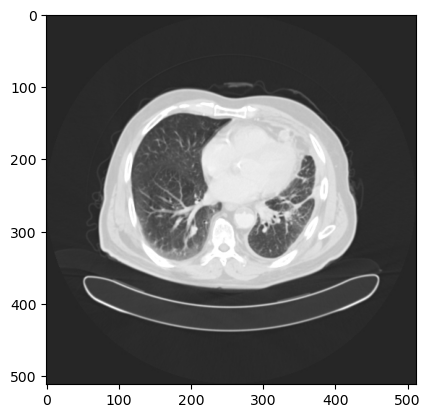

In [38]:
plt.imshow(img)

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [46]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your data folder
data_folder = 'Data\\Train'

# Set the path to the folder where you want to store the training and testing data
output_folder = 'Data\\final_data'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all subfolders (classes) in the data folder
classes = os.listdir(data_folder)

# Loop through each class and split the data into training and testing sets
for class_name in classes:
    class_folder = os.path.join(data_folder, class_name)
    output_train_folder = os.path.join(output_folder, 'train', class_name)
    output_test_folder = os.path.join(output_folder, 'test', class_name)

    # Create train and test folders for each class
    os.makedirs(output_train_folder, exist_ok=True)
    os.makedirs(output_test_folder, exist_ok=True)

    # List all files in the class folder
    files = os.listdir(class_folder)

    # Split the files into training and testing sets
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

    # Copy training files to the output train folder
    for file in train_files:
        source_path = os.path.join(class_folder, file)
        destination_path = os.path.join(output_train_folder, file)
        shutil.copyfile(source_path, destination_path)

    # Copy testing files to the output test folder
    for file in test_files:
        source_path = os.path.join(class_folder, file)
        destination_path = os.path.join(output_test_folder, file)
        shutil.copyfile(source_path, destination_path)


In [56]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_height = 256  
image_width = 256
num_channels = 1   

# Set other parameters
batch_size = 32
num_epochs = 10
num_classes = len(os.listdir('Data\\final_data\\train'))

# Set up the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('Data\\final_data\\train',
                                                   target_size=(image_height, image_width),
                                                   color_mode='grayscale',  # Specify grayscale
                                                   batch_size=batch_size,
                                                   class_mode='sparse') 

test_generator = test_datagen.flow_from_directory('Data\\final_data\\test',
                                                 target_size=(image_height, image_width),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='sparse')

# Train the model
history = model.fit(train_generator, 
                    epochs=num_epochs, 
                    validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


Found 876 images belonging to 3 classes.
Found 221 images belonging to 3 classes.
Epoch 1/10
28/28 [==============================] - 48s 2s/step - loss: 2.9075 - accuracy: 0.6370 - val_loss: 0.4339 - val_accuracy: 0.8507
Epoch 2/10
28/28 [==============================] - 47s 2s/step - loss: 0.1949 - accuracy: 0.9441 - val_loss: 0.0916 - val_accuracy: 0.9819
Epoch 3/10
28/28 [==============================] - 47s 2s/step - loss: 0.0413 - accuracy: 0.9909 - val_loss: 0.0733 - val_accuracy: 0.9729
Epoch 4/10
28/28 [==============================] - 47s 2s/step - loss: 0.0114 - accuracy: 0.9989 - val_loss: 0.0460 - val_accuracy: 0.9819
Epoch 5/10
28/28 [==============================] - 46s 2s/step - loss: 0.0057 - accuracy: 0.9966 - val_loss: 0.0504 - val_accuracy: 0.9864
Epoch 6/10
28/28 [==============================] - 45s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9819
Epoch 7/10
28/28 [==============================] - 44s 2s/step - loss: 0.0067

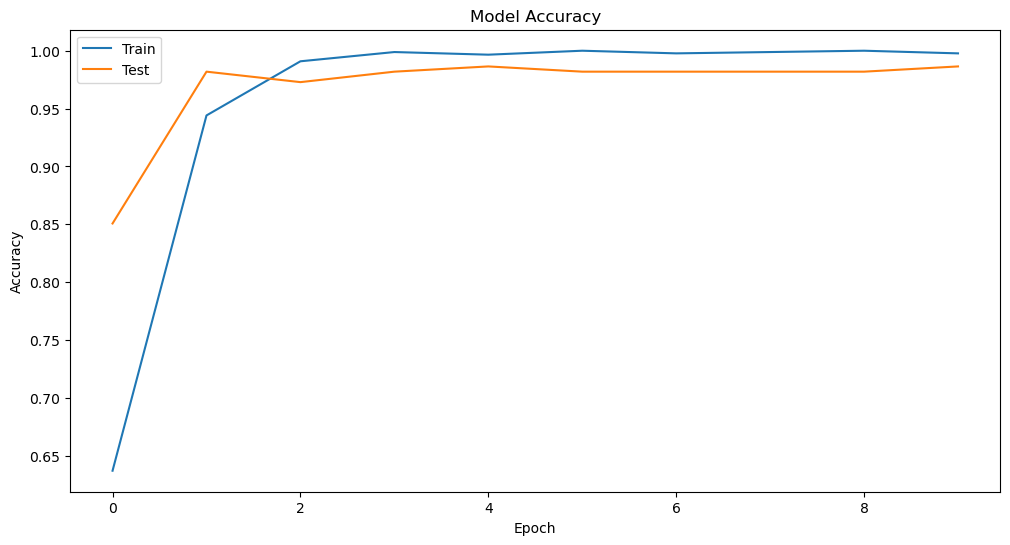

In [65]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [62]:

unlabelled_folder = 'Data\\Test\\Test cases'


image_files = [f for f in os.listdir(unlabelled_folder) if os.path.isfile(os.path.join(unlabelled_folder, f))]


for image_file in image_files:
    image_path = os.path.join(unlabelled_folder, image_file)

    img = image.load_img(image_path, target_size=(image_height, image_width), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values

    
    predictions = model.predict(img_array)

    
    predicted_class = np.argmax(predictions)

    
    print(f'Image: {image_file}, Predicted Class: {predicted_class}')


1/1 [==============================] - 0s 195ms/step
Image: 000001_03_01_088.png, Predicted Class: 1
1/1 [==============================] - 0s 53ms/step
Image: 000017_02_01_016.png, Predicted Class: 0
1/1 [==============================] - 0s 62ms/step
Image: 000019_01_01_021.png, Predicted Class: 0
1/1 [==============================] - 0s 60ms/step
Image: 000019_02_01_025.png, Predicted Class: 2
1/1 [==============================] - 0s 61ms/step
Image: 000019_03_01_025.png, Predicted Class: 0
1/1 [==============================] - 0s 62ms/step
Image: 000020_01_01_066.png, Predicted Class: 1
1/1 [==============================] - 0s 62ms/step
Image: 000020_02_01_062.png, Predicted Class: 0
1/1 [==============================] - 0s 61ms/step
Image: 000020_03_01_134.png, Predicted Class: 1
1/1 [==============================] - 0s 70ms/step
Image: 000020_03_01_166.png, Predicted Class: 1
1/1 [==============================] - 0s 59ms/step
Image: 000020_03_01_212.png, Predicted Class: 1

1/1 [==============================] - 0s 49ms/step
Image: 000143_05_01_120.png, Predicted Class: 0
1/1 [==============================] - 0s 48ms/step
Image: 000143_05_01_136.png, Predicted Class: 0
1/1 [==============================] - 0s 46ms/step
Image: 000185_02_04_174.png, Predicted Class: 2
1/1 [==============================] - 0s 48ms/step
Image: 000188_02_01_157.png, Predicted Class: 1
1/1 [==============================] - 0s 48ms/step
Image: 000188_03_01_146.png, Predicted Class: 1
1/1 [==============================] - 0s 53ms/step
Image: 000196_03_02_132.png, Predicted Class: 1
1/1 [==============================] - 0s 46ms/step
Image: 000196_03_02_173.png, Predicted Class: 1
1/1 [==============================] - 0s 49ms/step
Image: 000198_05_01_112.png, Predicted Class: 1
1/1 [==============================] - 0s 51ms/step
Image: 000198_05_01_124.png, Predicted Class: 1
1/1 [==============================] - 0s 47ms/step
Image: 000199_01_02_207.png, Predicted Class: 1


1/1 [==============================] - 0s 38ms/step
Image: 000315_04_03_145.png, Predicted Class: 2
1/1 [==============================] - 0s 42ms/step
Image: 000316_01_01_071.png, Predicted Class: 2
1/1 [==============================] - 0s 38ms/step
Image: 000328_08_03_167.png, Predicted Class: 2
1/1 [==============================] - 0s 38ms/step
Image: 000328_08_03_172.png, Predicted Class: 2
1/1 [==============================] - 0s 38ms/step
Image: 000328_08_03_180.png, Predicted Class: 2
1/1 [==============================] - 0s 39ms/step
Image: 000569_08_01_020.png, Predicted Class: 0
1/1 [==============================] - 0s 40ms/step
Image: 000747_03_03_172.png, Predicted Class: 2
1/1 [==============================] - 0s 40ms/step
Image: 000749_03_02_108.png, Predicted Class: 2
1/1 [==============================] - 0s 41ms/step
Image: 000874_03_02_219.png, Predicted Class: 0
1/1 [==============================] - 0s 45ms/step
Image: 001083_09_01_093.png, Predicted Class: 1


In [64]:
y_true = []
y_pred = []

for i in range(len(test_generator)):
    batch_x, batch_y = test_generator[i]
    y_true.extend(batch_y)

    # Make predictions using the trained model
    predictions = model.predict(batch_x)
    y_pred.extend(np.argmax(predictions, axis=1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 259ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        24
         1.0       0.99      1.00      1.00       113
         2.0       0.99      0.98      0.98        84

    accuracy                           0.99       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.99      0.99      0.99       221

